# EXERCISE SHEET 4, EXERCISE 2: Giant Component in ER-Model

The goal of this exercise is to observe and verify the behaviour of the ER-Model under different parameter specifications.

In [2]:
#import the neccessary packages
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# QUESTION 1:
Generate a function that samples instances of ER-$G(N,p)$ models. Given a simple graph G = (V,E), the probability that your function outputs G should be equal to $p^M (1-p)^{\binom{N}{2}-M}$, where $M = |E|$.

Your function could follows this sturcture:
- Take as inputs two paramters $N \in \mathbb{N}$ and $p \in [0,1]$;
- Create an empty undirected networkx graph with $N$ nodes;
- Loop over each pair of nodes $(i,j)$ and with probability $p$, add an edge between $i$ and $j$;
- Return the graph.

Generate a few test graphs, compute their average degree and plot their degree distributions. Verify that the results you obtain are consistent with what you expect from the analytical derivations of the lecture.

# Answer 1:


In [3]:
def sample_ER(N, p):
    rd = np.random.rand(N,N)
    # we multiply by 2 since when iterating over nodes (i,j) each edge is considered twice
    A = np.triu(rd < (p))
    np.fill_diagonal(A, 0)
    return nx.from_numpy_matrix(A)

In [4]:

def test_sample_ER():
    N = 6
    p = 0.2
    subject = sample_ER(N, p)
    truth_M = subject.number_of_edges()
    truth_N = subject.number_of_nodes()
    
    equal_graphs_p = p ** truth_M * (1 - p) ** (truth_N * (truth_N - 1) * 0.5 - truth_M)

    equals = 0
    k = 100000
    for i in range(k):
        other = sample_ER(N, p)
        if nx.utils.graphs_equal(subject, other):
            equals += 1
    print(equals, ' equals out of : ', k, ' totals.')
    print('expected probability: ', equal_graphs_p, ' empirical probability: ', equals / k)

test_sample_ER()

880  equals out of :  100000  totals.
expected probability:  0.008796093022208008  empirical probability:  0.0088


# QUESTION 2:
In the second part of the exercise we want to generate various instances of ER-models. For each $n \in \{ 25, 100, 500, 2000 \}$:
- Find (matemathically, not numerically) the critical values $\tilde{p} \in [0,1]$ at which $G(n, \tilde{p})$ transitions from the regime with many small components to the regime with one giant component.
- Use your previously defined function to generate graphs in three regimes: below $\tilde{p}$, at $\tilde{p}$, and above $\tilde{p}$ (avoid the trivial cases $p \in \{ 0,1 \}$).

In total you should have 12 graphs.

# Answer 2:

In [5]:
N_list = [25, 100, 500, 2000]
graphs = []
for i in range(len(N_list)):
    N = N_list[i]
    p_tilde = 1 / (N - 1)
    
    graphs.append(sample_ER(N, p_tilde * 0.5))
    graphs.append(sample_ER(N, p_tilde))
    graphs.append(sample_ER(N, p_tilde * 1.2))

# QUESTION 3:

Plot the graphs as 4 by 3 subplots.
As a suggestion, put $N$ on the $x$ axis (increasing left to right); and the density regimes on the $y$ axis (increasing from top to bottom).

# Answer 3:

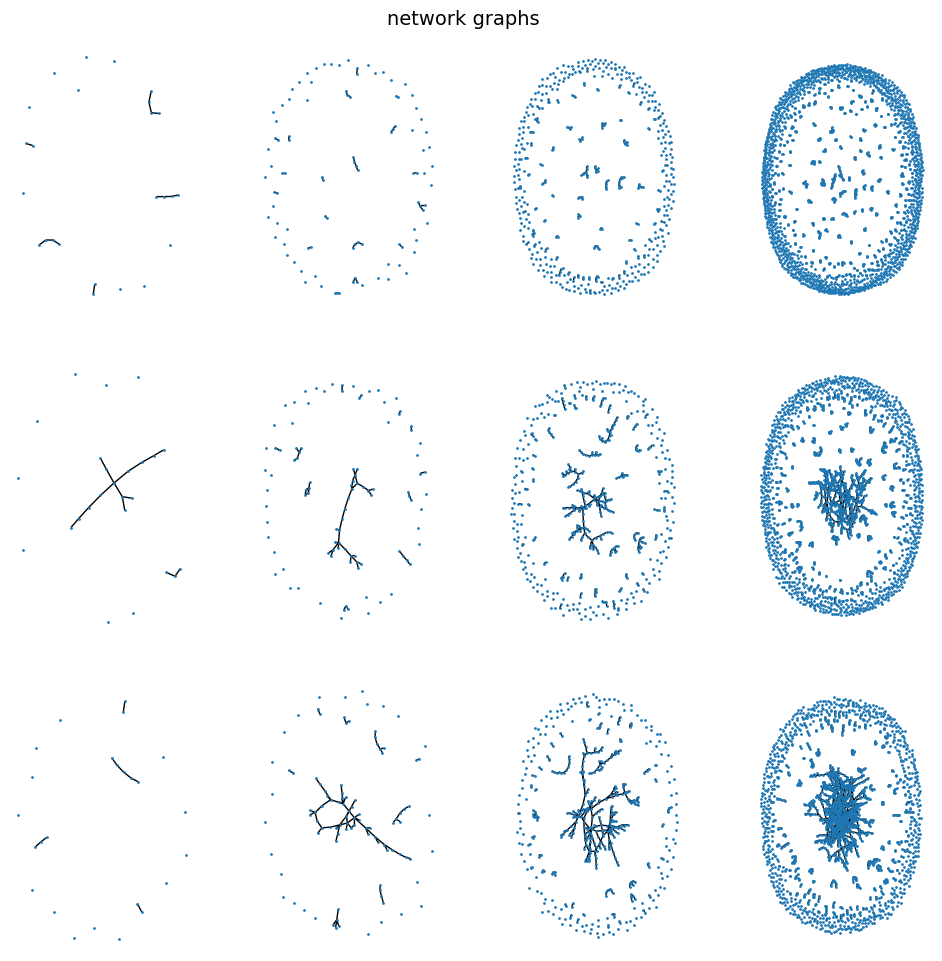

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
fig.suptitle("network graphs", fontsize=14)
fig.tight_layout() 

for i in range(len(N_list)):
    nx.draw(graphs[i*3], ax=axs[0,i], node_size=1)
    #axs[0,i].set_title("N = " + str(N_list[i]) + " p = " + str(p_tilde * 0.5))
    nx.draw(graphs[i*3+1], ax=axs[1,i], node_size=1)
    #axs[0,i].set_title("N = " + str(N_list[i]) + " p = " + str(p_tilde))
    nx.draw(graphs[i*3+2], ax=axs[2,i], node_size=1)
    #axs[0,i].set_title("N = " + str(N_list[i]) + " p = " + str(p_tilde * 1.3))
    
    

# QUESTION 4:
What do you observe in your plots?

# Answer 4:

The phase transitions as described in the lecture are clearly observable. As p increase above the critical point (last row) clearly a single critical component is observable where only very little smaller subcomponents are visisble. When p is below the critical point (first row) the connected components are very small and populous.